In [1]:
import numpy as np
import pandas as pd

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Prerequisites

## MNIST Dataset

이번 과제는 [MNIST 필기체 데이터셋](http://yann.lecun.com/exdb/mnist/)을 활용하여 필기체 이미지를 인식하는 이미지 인식 알고리즘을 Single-layer Neural Network로 작성합니다.

가로 28px, 세로 28px의 필기체 이미지가 주어지며, 필기체는 숫자 0부터 9까지 총 10개의 Label로 구성되어 있습니다. 이미지는 컬러가 없는 흑백 데이터이며, 한 픽셀의 값은 0 ~ 255 입니다. (0일수록 어둡고, 255일수록 밝습니다)

데이터는 60,000개의 Train 데이터와 10,000개의 Test 데이터가 주어지는데, Train 데이터로 Single-layer Neural Network를 학습한 뒤 Test 데이터로 정확도(accuracy)를 측정합니다. 각 변수의 세부 정보는 다음과 같습니다.

  * **X_train**: **Train 데이터의 Feature** 입니다. 가로 28px, 세로 28px, 총 60,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255 입니다. (0일수록 어둡고, 255일수록 밝습니다)
  * **y_train**: **Train 데이터의 Label** 입니다. 총 60,000 개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지 입니다.
  * **X_test**: **Test 데이터의 Feature** 입니다. 가로 28px, 세로 28px, 총 10,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255 입니다. (0일수록 어둡고, 255일수록 밝습니다)
  * **y_test**: **Test 데이터의 Label** 입니다. 총 10,000 개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지 입니다.

In [2]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


[5 0 4 1 9 2 1 3 1 4]


<Figure size 432x288 with 0 Axes>

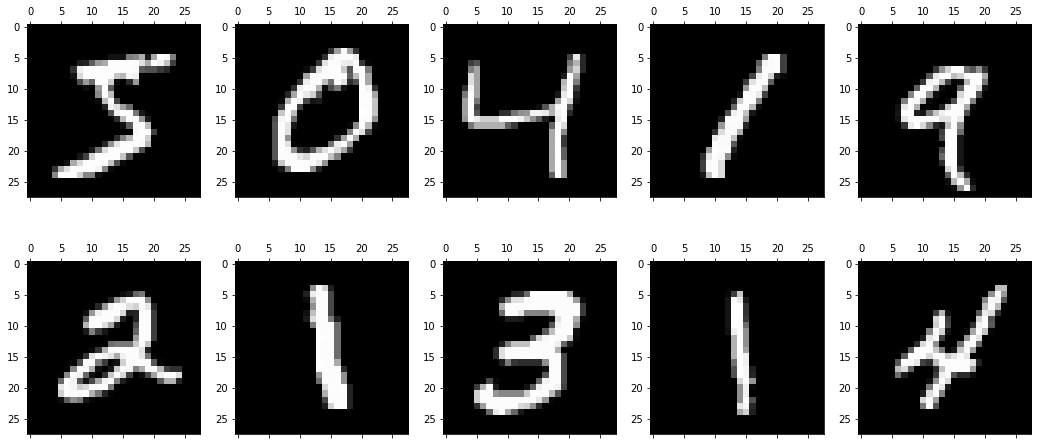

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Preprocessing

In [4]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [5]:
from keras.utils import to_categorical

# One hot encoding을 합니다.
# np.eye(10)[y_train]과 동일합니다.
y_train_hot = to_categorical(y_train)

# np.eye(10)[y_test]와 동일합니다.
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape)
print(y_test_hot.shape)

(60000, 10)
(10000, 10)


### Define Sigmoid

In [6]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

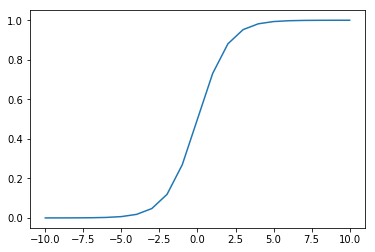

In [7]:
xx = np.linspace(-10, 10, num=21)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

In [8]:
# Write your code here!
# X_train = features / y_train = label

num_epoch = 200
learning_rate = 1.2

w = np.random.uniform(low=0.0, high=1.0, size = (784, 10))
b = np.random.uniform(low=0.0, high=1.0, size = (1, 10))


for epoch in range(num_epoch):
    y_predict_hot = X_train.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)
   
    y_predict = y_predict_hot.argmax(axis=1)
 
    error = (y_predict != y_train).mean()
    
    if error < 0.12:
        break
        
    if epoch % 10 == 0:
        print("{0:2} error = {1:.10f}".format(epoch, error))
        
    b_ones= np.ones((1,60000))
    
    w = w - learning_rate * X_train.T.dot(y_predict_hot - y_train_hot)
    b = b - learning_rate * b_ones.dot((y_predict_hot - y_train_hot))
    
print("----" * 10)
print("{0:2} error = {1:.10f}".format(epoch, error))


 0 error = 0.9012833333


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


10 error = 0.3063000000
20 error = 0.3002666667
30 error = 0.2290833333
40 error = 0.2257500000
50 error = 0.2403000000
60 error = 0.2112500000
70 error = 0.3112166667
80 error = 0.2662166667
90 error = 0.2820666667
100 error = 0.3263000000
110 error = 0.2135000000
120 error = 0.2249666667
130 error = 0.2570166667
140 error = 0.3220500000
150 error = 0.2055166667
160 error = 0.2240833333
170 error = 0.1928833333
180 error = 0.1896000000
190 error = 0.3115833333
----------------------------------------
199 error = 0.2344333333


In [9]:
y_predict_hot = X_train.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = np.argmax(y_predict_hot, axis=1)

result = pd.DataFrame(X_train)
result["number(actual)"] = y_train
result["number(predict)"] = y_predict

print(result.shape)
result

(60000, 786)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0  1  2  3  4  5  6  7  8  9       ...         776  777  778  779  780  \
0      0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
1      0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
2      0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
3      0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
4      0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
5      0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
6      0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
7      0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
8      0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
9      0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
10     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
11     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
12     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
13     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
14     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
15     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
16     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
17     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
18     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
19     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
20     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
21     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
22     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
23     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
24     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
25     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
26     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
27     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
28     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
29     0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
...   .. .. .. .. .. .. .. .. .. ..       ...         ...  ...  ...  ...  ...   
59970  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59971  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59972  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59973  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59974  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59975  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59976  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59977  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59978  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59979  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59980  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59981  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59982  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59983  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59984  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59985  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59986  0  0  0  0  0  0  0  0  0  0       ...           0    0    0    0    0   
59987  0  0  0  0  0  0  0  0  0  0   